___
## 1.1 Estimación del Centro de Masa de una Lámina Bidimensional.
> Debe describir el trabajo.

## 1.2 Introducción
> Debe contextualizar y describir el problema que se va a trabajar.


## 1.3 Objetivos del la estimación.
> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser concretos, evaluables y verificables.
> - Deben ser escritos en infinitivo.
> #### 1.1 Objetivo general.
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.
> #### 1.2 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos


## 1.4 Modelo que representa el problema

#### Modelado
En este problema estamos tratando de encontrar el centro de masa de una lámina bidimensional con densidad de masa variable. Para ello, utilizaremos el siguiente modelo:

#### Ecuacionesque rigen al sistema

Las ecuaciones que rigen el sistema son las siguientes:

1. La densidad de masa $(\rho(x, y))$ de la lámina bidimensional.
   
   En nuestro caso, hemos tomado $(\rho(x, y) = 15)$, lo que significa que la densidad de masa no es constante en toda la lámina.

2. Los momentos respecto a los ejes \(x\) y \(y\) se definen como:

   $[M_x = \iint_R x \cdot \rho(x, y) \, dA]$
   $[M_y = \iint_R y \cdot \rho(x, y) \, dA]$

#### Deducción del modelo

La deducción del modelo se basa en el concepto de centro de masa de un objeto bidimensional. La masa total de la lámina está distribuida de manera variable sobre la región $(R)$, representada por la función de densidad $(\rho(x, y))$. Para encontrar el centro de masa, necesitamos calcular los momentos respecto a los ejes $(x)$ y $(y)$ y luego dividirlos por la masa total.

#### Situación representada y limitaciones

El modelo representa la situación en la que tenemos una lámina bidimensional con densidad de masa variable. Sin embargo, es importante destacar las siguientes limitaciones fundamentales:

- La densidad de masa $(\rho(x, y))$ debe ser una función conocida y definida sobre la región $(R)$ para que el modelo sea aplicable.
- El modelo asume una distribución bidimensional, por lo que no sería directamente aplicable a situaciones tridimensionales.

#### Significado y valor de los parámetros

En nuestro caso, el único parámetro relevante es la densidad de masa $(\rho(x, y))$, que hemos fijado en $(\rho(x, y) = 1)$. Esto significa que la densidad de masa es constante en toda la lámina y, por lo tanto, no hay parámetros variables en este modelo particular.


In [17]:
# Escribir la función acá
def montecarlo2(region, a1, b1, a2, b2, N):
    AR = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    bi = region(x, y)
    AD_approx = AR*np.mean(bi)
    return AD_approx

### 1.5 Solución del problema 1.

In [18]:
def region(x, y):
    # Definir la región R
    return x**2 + y**2 <= 1

# Densidad variable, pero conocida
def densidad_masa(x, y):
    return 15

a1, b1, a2, b2 = -1, 1, -1, 1
N = 10000  # Número de términos para la aproximación

Mx_approx = montecarlo2(lambda x, y: x*densidad_masa(x, y), a1, b1, a2, b2, N)
My_approx = montecarlo2(lambda x, y: y*densidad_masa(x, y), a1, b1, a2, b2, N)

print(f"Aproximación del momento respecto al eje x (Mx): {Mx_approx}")
print(f"Aproximación del momento respecto al eje y (My): {My_approx}")


Aproximación del momento respecto al eje x (Mx): 0.16342826110050432
Aproximación del momento respecto al eje y (My): 0.5278186995863136


### 1.6 Visualización de la solución del problema 1.
> Se deben mostrar gráficas y/o tablas que ilustren de forma adecuada los resultados. No olviden etiquetar los ejes y si se tienen varias curvas en una sola gráfica también etiquetarlas (ojo: que las curvas se puedan diferenciar con colores y estilos de línea).

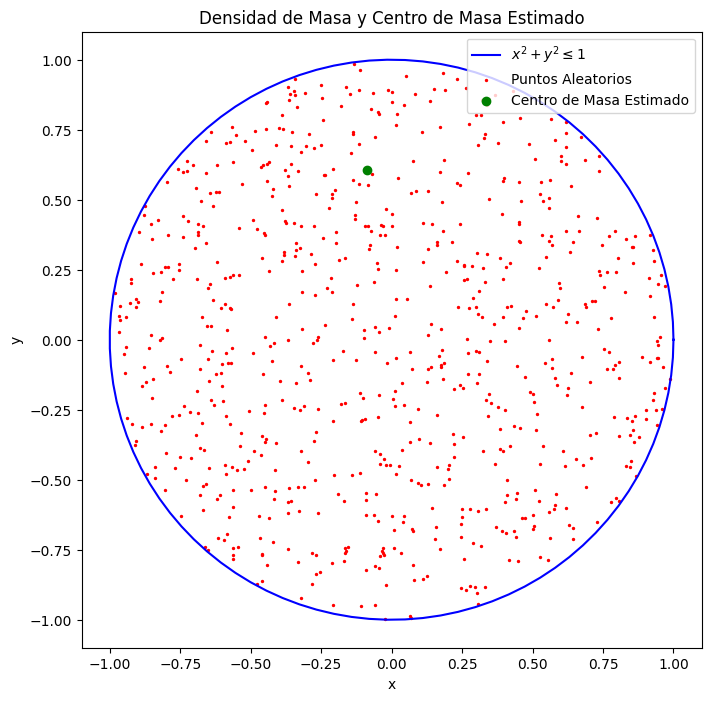

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la función de densidad rho(x, y)
def densidad_masa(x, y):
    return 15

# Definir la región R
a1, b1, a2, b2 = -1, 1, -1, 1

# Crear la gráfica de la región R
plt.figure(figsize=(8, 8))
theta = np.linspace(0, 2*np.pi, 100)
x_circulo = np.cos(theta)
y_circulo = np.sin(theta)
plt.plot(x_circulo, y_circulo, color='blue', label=r'$x^2 + y^2 \leq 1$')

# Generar puntos aleatorios en la región R
num_puntos = 1000
x_aleatorios = np.random.uniform(a1, b1, num_puntos)
y_aleatorios = np.random.uniform(a2, b2, num_puntos)

# Filtrar puntos dentro de la región R
x_dentro = x_aleatorios[x_aleatorios**2 + y_aleatorios**2 <= 1]
y_dentro = y_aleatorios[x_aleatorios**2 + y_aleatorios**2 <= 1]

# Mostrar puntos aleatorios dentro de la región R
plt.scatter(x_dentro, y_dentro, color='red', s=2, label='Puntos Aleatorios')

# Mostrar el centro de masa estimado
Mx_approx, My_approx = montecarlo2(lambda x, y: x*densidad_masa(x, y), a1, b1, a2, b2, N), montecarlo2(lambda x, y: y*densidad_masa(x, y), a1, b1, a2, b2, N)
plt.scatter(Mx_approx, My_approx, color='green', label='Centro de Masa Estimado')

plt.title('Densidad de Masa y Centro de Masa Estimado')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


___
## 2.1 Problema de Monty Hall (2).

## 2.2 Introducción
> El problema de Monty Hall es un problema de probabilidad basado en un concurso de televisión. En este concurso, el participante tiene la oportunidad de elegir entre tres puertas, detrás de una de las cuales se encuentra un premio, mientras que las otras dos contienen cabras.


## 2.3 Objetivos del problema de Monty Hall (2).
> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser concretos, evaluables y verificables.
> - Deben ser escritos en infinitivo.
> #### 1.1 Objetivo general.
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.
> #### 1.2 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.


### 2.4 Modelo que representa el problema de Monty Hall (2).

#### Modelado
> - Elección Inicial: El participante realiza una elección inicial entre l]as tres puertas.
> - 
Acción del Presentador: Una vez hecha la elección del participante, el presentador, quien conoce el contenido detrás de cada puerta, abre una de las dos puertas restantes que no ha sido elegida por el participante. Esta puerta revelada siempre contiene una cabr.> - 

Elección Final: El participante tiene la opción de mantener su elección original o cambiar a la otra puerta que no ha sido abierta ni elegida inicialme

#### Ecuaciones que rigen al sistema
> - El problema de Monty Hall no se rige por ecuaciones matemáticas en el sentido tradicional. En su lugar, se basa en conceptos de probabilidad y toma de decisiones. Si el participante elige al azar, la probabilidad de elegir la puerta con el premio al principio es de 1/3.

#### Deducción del modelo
> - No incluye ecuaciones matemáticas en el sentido tradicional, ya que se basa en conceptos de probabilidad y toma decisiones discretas.

#### Situación representada y limitaciones
> - Representa una situación de decisión bajo incertidumbre, donde el participante debe elegir entre diferentes opciones con información parcial. La principal limitación es que se basa en un juego simplificado y no tiene en cuenta factores externos o complejidades adicionales.

#### Significado y valor de los parámetros
> - El modelo no tiene parámetros o constantes específicas. Sin embargo, se asume que todas las puertas y elecciones son igualmente probables y que el presentador siempre revela una puerta con una cabra.nte.

In [2]:
# Método de Montecarlo
def montecarlo1(f, a, b, N):
    # Generar N puntos uniformemente distribudos en el intervalo [a,b)
    ui = np.random.uniform(a, b, N)
    # Evaluar la función en los N puntos aleatorios, obtener el promedio y multiplicarlo por el intervalo
    integral = ((b-a)/N)*np.sum(f(ui))
    # integral = (b-a)*np.mean(f(ui))   Esta línea es equivalente a la anterior
    return integral

### 2.5 Solución del problema de Monty Hall (2).

In [2]:
import numpy as np

def montecarlo1(f, a, b, N):
    ui = np.random.uniform(a, b, N)
    integral = ((b-a)/N)*np.sum(f(ui))
    return integral

def montecarlo_monty_hall(N):
    def f(x):
        return montecarlo_monty_hall_individual()

    def montecarlo_monty_hall_individual():
        num_ganadas = 0

        for _ in range(N):
            # Simulación de un juego de Monty Hall
            puerta_con_premio = np.random.randint(1, 4)
            eleccion_concursante = np.random.randint(1, 4)

            puertas_posibles = [1, 2, 3]
            puertas_posibles.remove(eleccion_concursante)
            if eleccion_concursante != puerta_con_premio:
                puertas_posibles.remove(puerta_con_premio)
            puerta_revelada = np.random.choice(puertas_posibles)

            puertas_restantes = [puerta for puerta in [1, 2, 3] if puerta != eleccion_concursante and puerta != puerta_revelada]
            eleccion_final = np.random.choice(puertas_restantes)

            if eleccion_final == puerta_con_premio:
                num_ganadas += 1

        probabilidad_de_ganar = num_ganadas / N
        return probabilidad_de_ganar

    a = 0
    b = N
    return montecarlo1(f, a, b, N)

# Ejemplo de uso
N = 100000
resultado = montecarlo_monty_hall(N)
print(f"Después de {N} simulaciones, la probabilidad de ganar cambiando de puerta es aproximadamente {resultado:.4f}")


Después de 100000 simulaciones, la probabilidad de ganar cambiando de puerta es aproximadamente 0.6688


### 2.6 Visualización de la solución del problema 2.
> Se deben mostrar gráficas y/o tablas que ilustren de forma adecuada los resultados. No olviden etiquetar los ejes y si se tienen varias curvas en una sola gráfica también etiquetarlas (ojo: que las curvas se puedan diferenciar con colores y estilos de línea).

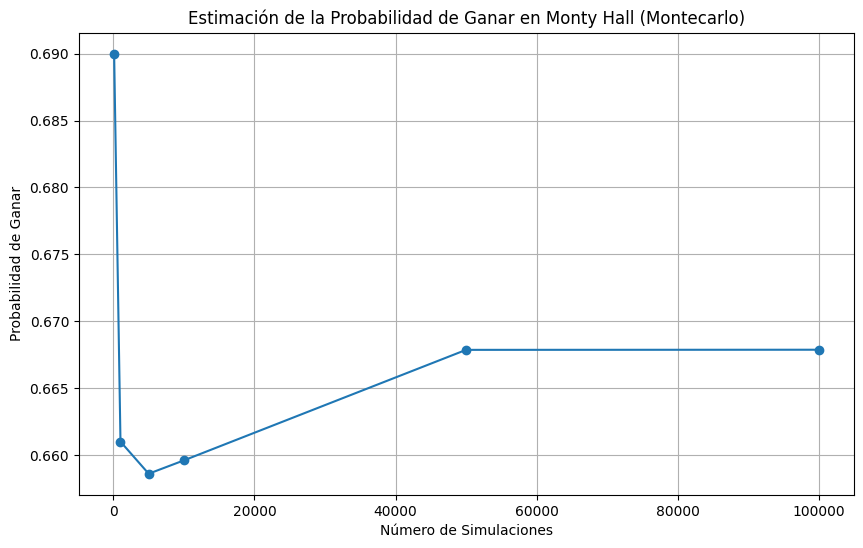

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def montecarlo1(f, a, b, N):
    ui = np.random.uniform(a, b, N)
    integral = ((b-a)/N)*np.sum(f(ui))
    return integral

def montecarlo_monty_hall(N):
    def f(x):
        return montecarlo_monty_hall_individual()

    def montecarlo_monty_hall_individual():
        num_ganadas = 0

        for _ in range(N):
            # Simulación de un juego de Monty Hall
            puerta_con_premio = np.random.randint(1, 4)
            eleccion_concursante = np.random.randint(1, 4)

            puertas_posibles = [1, 2, 3]
            puertas_posibles.remove(eleccion_concursante)
            if eleccion_concursante != puerta_con_premio:
                puertas_posibles.remove(puerta_con_premio)
            puerta_revelada = np.random.choice(puertas_posibles)

            puertas_restantes = [puerta for puerta in [1, 2, 3] if puerta != eleccion_concursante and puerta != puerta_revelada]
            eleccion_final = np.random.choice(puertas_restantes)

            if eleccion_final == puerta_con_premio:
                num_ganadas += 1

        probabilidad_de_ganar = num_ganadas / N
        return probabilidad_de_ganar

    a = 0
    b = N
    return montecarlo1(f, a, b, N)

# Lista para almacenar las probabilidades estimadas
N_values = [100, 1000, 5000, 10000, 50000, 100000]
probabilidades = []

# Realizar simulaciones y guardar las probabilidades
for N in N_values:
    resultado = montecarlo_monty_hall(N)
    probabilidades.append(resultado)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(N_values, probabilidades, marker='o')
plt.title('Estimación de la Probabilidad de Ganar en Monty Hall (Montecarlo)')
plt.xlabel('Número de Simulaciones')
plt.ylabel('Probabilidad de Ganar')
plt.grid(True)
plt.show()


### 3 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 4 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

___
### 2.2 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación en power point para presentar el trabajo en la clase del **Lunes 31 de Octubre de 2022.** La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - **NO DEBE TENER CÓDIGO, PARA ESO ES EL INFORME EN EL NOTEBOOK**
> - Presentación: **MÁXIMO** 10 minutos. Se interrumpirá la presentación del equipo a los 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>